## diagrammes géochimiques de base

un truc qu'on fait souvent, en géochimie, c'est de tracer des graphes débiles. 
typiquement des graphes ratio-ratio
ou alors des graphes ternaires (pas pour ce qui me concerne, mais bon...)

et puis, quand on fait des graphes ratio-ratio, il y a toujours la question de la drotie de mélange. est-ce que c'est une droite ? pas une droite ? 

et puis d'abord je veux un graphe en log-log, parce que c'est plus lisible. et puis il y en a qui disent que quand on fait du fractionnement continu, on devrait de toute façon faire du log-log... mais quid de la courbe de mélange ?

allons y voir de plus près


In [1]:
import pandas as pd
from numpy import linspace, logspace
import matplotlib.pyplot as plt
%matplotlib inline


      X    Y    Z       X/Z       Y/Z
S1  100   10  100  1.000000  0.100000
S2   10  200   68  0.147059  2.941176
S3    2    8    6  0.333333  1.333333
S4   50    3   25  2.000000  0.120000


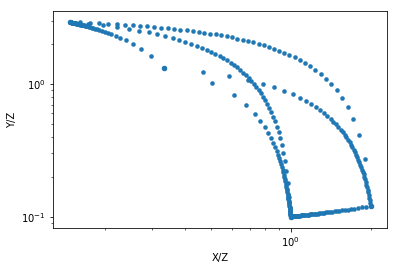

In [7]:
sources = pd.DataFrame({'S1' : {'X':100,'Y':10,'Z':100},
                        'S2' : {'X':10,'Y': 200,'Z':68},
                        'S3' : {'X': 2,'Y': 8,'Z':6},
                        'S4' : {'X': 50,'Y': 3,'Z':25}  }).T

sources['X/Z']=sources['X']/sources['Z']
sources['Y/Z']=sources['Y']/sources['Z']

print(sources)

ax = sources.plot(kind='scatter',x='X/Z',y='Y/Z',logx=True,logy=True)

def mix(dfS,A,B):
    alpha = linspace(0,1)
    mixed = {x:dfS.loc[A,x]*alpha+dfS.loc[B,x]*(1-alpha) for x in ['X','Y','Z']}
    mixed = pd.DataFrame(mixed)
    mixed['X/Z']=mixed['X']/mixed['Z']
    mixed['Y/Z']=mixed['Y']/mixed['Z']
    return mixed

mix(sources,'S1','S2').plot(kind='scatter',x='X/Z',y='Y/Z',style='-',ax=ax,lw=0.1)
mix(sources,'S2','S3').plot(kind='scatter',x='X/Z',y='Y/Z',style='-',ax=ax,lw=0.1)
mix(sources,'S4','S3').plot(kind='scatter',x='X/Z',y='Y/Z',style='-',ax=ax,lw=0.1)
mix(sources,'S4','S1').plot(kind='scatter',x='X/Z',y='Y/Z',style='-',ax=ax,lw=0.1)
mix(sources,'S4','S2').plot(kind='scatter',x='X/Z',y='Y/Z',style='-',ax=ax,lw=0.1)
mix(sources,'S1','S3').plot(kind='scatter',x='X/Z',y='Y/Z',style='-',ax=ax,lw=0.1)

